# Relation between religious and political affiliation in the USA

I want to analyse how the voting for Democratic versus Republican parties in the last two elections relate to the religious Affiliation of US-Citizens. To adress this question I use the following dataset:

- https://data.world/garyhoov/election-and-religion - Table: 2016 Election and 2010 Religion by County.xlsx
    
    For the different states and counties in the USA this datasets contains data about the votes for Democratic versus Republican parties in the elections in 2010 and 2016 and the religious adherents 

To create a Pie plot of the distributions of the relgions in the USA, I use the following dataset:

- https://en.wikipedia.org/wiki/Religion_in_the_United_States - Table: Religion in the United States according to the American Values Atlas published by the Public Religion Research Institute (2016)

### Loading the libraries and parsing the wikipedia table with beoutiful soup

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
%matplotlib notebook
from scipy import stats
import requests 
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup 
import ssl 

Libraries imported.


In [2]:
#parsing the table from the wikipedia page using beautiful soup
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

url = "https://en.wikipedia.org/wiki/Religion_in_the_United_States"
html = urllib.request.urlopen(url, context=ctx).read() 
soup = BeautifulSoup(html, 'html.parser')

In [3]:
tables = soup("table")
religions = tables[4]
religions

<table class="wikitable sortable">
<caption style="font-size:100%">Religion in the United States according to the American Values Atlas published by the Public Religion Research Institute (2016)<sup class="reference" id="cite_ref-AVA2017_22-6"><a href="#cite_note-AVA2017-22">[22]</a></sup>
</caption>
<tbody><tr>
<th>Affiliation
</th>
<th colspan="2">% of U.S. population
</th></tr>
<tr>
<td>Christian
</td>
<td align="right"><b>69</b>
</td>
<td align="left"><span style="display:none;">69</span><div style="width:138px;height:2ex;background:#aaa;background:darkblue"> </div>
</td></tr>
<tr>
<td style="text-align:left; text-indent:15px;">Protestant
</td>
<td align="right"><b>45</b>
</td>
<td align="left"><span style="display:none;">45</span><div style="width:90px;height:2ex;background:#aaa;background:mediumblue"> </div>
</td></tr>
<tr>
<td style="text-align:left; text-indent:30px;">White Evangelical
</td>
<td align="right"><b>17</b>
</td>
<td align="left"><span style="display:none;">17</span

In [4]:
#going through the html code and storing the relevant information in a dataframe
rel= pd.DataFrame(columns = ['Affiliation','% US-Population'])
for tr in religions("tr")[1:]: 
        tds=tr("td") 
        aff = tds[0].text.rstrip()
        pop = tds[1].text.rstrip() 
        rel= rel.append({'Affiliation': aff, '% US-Population': pop}, ignore_index=True) 

In [5]:
rel.head()

,Affiliation,% US-Population
0,Christian,69
1,Protestant,45
2,White Evangelical,17
3,White Mainline Protestant,13
4,Black Protestant,8


In [6]:
#further processing of the datasbase
rel.set_index("Affiliation", inplace = True)
rel['% US-Population'] = rel['% US-Population'].astype('int64')
#only keeping the biggest religious groups
rel_pk = rel.drop(["Christian", "White Evangelical","White Mainline Protestant", "Black Protestant", "Hispanic Protestant","Other non-white Protestant", "White Catholic", "Hispanic Catholic", "Other non-white Catholic", "Non-Christian", "Other non-Christian", "Don't know/refused answer", "Total"]) 
# creating series with other religions
others = 100 - (rel_pk["% US-Population"].sum()) 
rel_pk = rel_pk.append(pd.Series(data={'% US-Population': others}, name=('Others'))) 
#sorting by population
rel_pk.sort_values(["% US-Population"], ascending=False, axis=0, inplace=True) 

### Pie Chart of the religions in the USA

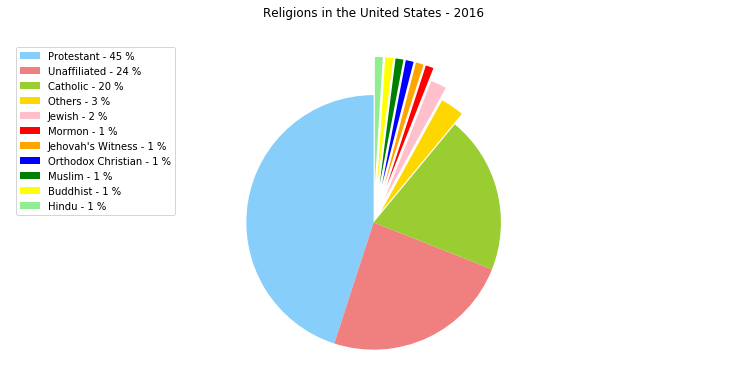

In [7]:
colors_list = ['lightskyblue','lightcoral','yellowgreen','gold', 'pink', 'red', 'orange', 'blue', 'green', 'yellow', 'lightgreen']
explode_list = [0, 0, 0, 0.1, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3] 
labels =['{} - {} %'.format(i,j) for i,j in zip(rel_pk.index, rel_pk['% US-Population'])]

plt.figure(figsize=(13, 6))
patches, texts = plt.pie(rel_pk['% US-Population'],
                            startangle=90,          
                            colors=colors_list,  
                            explode=explode_list 
                            )

plt.title('Religions in the United States - 2016', y=1.06)
#get rid of labels 
plt.axis('equal') 
plt.ylabel('')
# add legend
plt.legend(labels = labels, loc='upper left') 

plt.show()

### Bar Chart showing the mean percentages of the religious adherents in the Democratic versus Republican dominated States

In [8]:
### Preprocessing the second dataset 
dfn=pd.read_excel("2010_2016_Election_and_Religion_USA.xlsx")
dfn.columns

Index(['State Code', 'County Name', 'County Population',
       'Clinton or Trump State', 'Clinton', 'Trump', 'Total', '% Clinton',
       '% Trump', 'Vote Difference C-T', 'Vote Difference T-C',
       'Percent Difference C-T', 'Percent Difference T-C', 'Obama', 'Romney',
       '2012 Total Votes', '% Obama', '% Romney', 'Vote Difference O-R',
       '% Difference O-R', 'Clinton B(W) Obama', 'Trump B(W) Romney',
       'Clinton % B(W) Obama', 'Trump % B(W) Romney', '2010 Land Area',
       'Density', 'Combined FIPS Code', 'ANSI Code', 'State FIPS Code',
       'County FIPS Code', 'CBSA Code', 'CSA Code', 'CBSA Title',
       'CBSA Population', 'Metropolitan/Micropolitan Statistical Area',
       'CSA Title', 'Metropolitan Division Title',
       'Metropolitan Division Code', 'Central/Outlying County', 'POP2010',
       'Total Congregations', 'Total Adherents',
       'Total Adherents per Thousand', 'Evangelical Protestant Adherents',
       'Evangelical Protestants Per Thousand', 'Bla

In [9]:
#grouping the states
group= dfn.groupby(["State Code"]).sum()
#getting rid of some columns
filtered = ["County Population",'Clinton','Trump', 'Total','Obama', 'Romney','2012 Total Votes', 'Evangelical Protestant Adherents', 'Black Protestant Adherents', 'Mainline Protestant  Adherents', 'Catholic Adherents','Orthodox Adherents', "Baha'I Adherents",'Total Buddhist Adherents', 'Latter Day Saints Adherents','Total Hindu Adherents','Muslims Estimated', 'Total Judaism Adherents']
df_el = group.loc[:, filtered]
#drop State AK due to missing values for all religions
df_el.drop("AK", inplace = True)

#summarize protestant groups
df_el["Protestants"] = df_el['Evangelical Protestant Adherents'] + df_el['Black Protestant Adherents'] + df_el['Mainline Protestant  Adherents']
df_el.drop(['Evangelical Protestant Adherents','Black Protestant Adherents', 'Mainline Protestant  Adherents', 'Baha\'I Adherents', 'Latter Day Saints Adherents'] , axis=1, inplace = True)

#change position of protestants
cols = list(df_el) 
cols.remove('Protestants') 
cols.insert(10,'Protestants') 
df_el= df_el.loc[:, cols] 

#get percebtages for all the religions
for i in df_el.loc[:, 'Catholic Adherents': ]:
    df_el[i] = df_el[i]/ df_el["County Population"]*100
    df_el[i] = df_el[i].round(decimals=2)

#get percentages for the votings
df_el["Clinton"] = df_el["Clinton"]/df_el["Total"]*100
df_el["Clinton"] = df_el["Clinton"].round(decimals=2)
df_el["Trump"] = df_el["Trump"]/df_el["Total"]*100
df_el["Trump"] = df_el["Trump"].round(decimals=2)
df_el["Obama"] = df_el["Obama"]/df_el["2012 Total Votes"]*100
df_el["Obama"] = df_el["Obama"].round(decimals=2)
df_el["Romney"] = df_el["Romney"]/df_el["2012 Total Votes"]*100
df_el["Romney"] = df_el["Romney"].round(decimals=2)

df_el.rename(columns={'Total Buddhist Adherents':'Buddhist Adherents(Percent)','Catholic Adherents':'Catholic Adherents(percent)', 'Orthodox Adherents':'Orthodox Adherents(Percent)','Protestants':'Protestants Adherents(Percent)','Total Hindu Adherents':'Hindu Adherents(Percent)', 'Muslims Estimated': 'Muslim Adherents(Percent)', 'Total Judaism Adherents':'Judaism Adherents'}, inplace=True)

In [10]:
#some final column drops for sparse table
df_el.drop(['County Population', 'Total', '2012 Total Votes'] , axis=1, inplace = True)

#create a dummy variable for domination for both years
df_el['Dominant_16'] = df_el['Trump'].apply(lambda x: 1 if (x >50)  else 0) 
df_el['Dominant_12'] = df_el['Romney'].apply(lambda x: 1 if (x >50)  else 0) 

# group by dummys and create means
group16 = df_el.groupby('Dominant_16').mean().round(decimals=2)
group12 = df_el.groupby('Dominant_12').mean().round(decimals=2)

#some drops
group16.drop(["Dominant_12", "Obama", 'Romney', "Clinton", "Trump"], axis = 1, inplace = True)
group12.drop(["Dominant_16", "Obama", 'Romney', "Clinton", "Trump"], axis = 1, inplace = True)

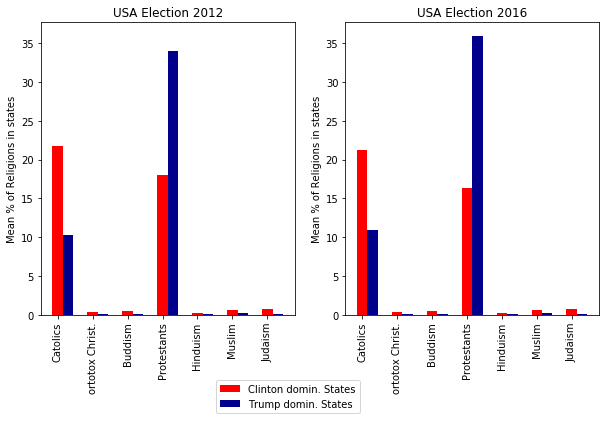

In [11]:
x = range(len([i for i in group12.columns]))
new_x= []
for item in x:
    new_x.append(item+0.3)
ticks = ["Catolics", "ortotox Christ.", "Buddism", "Protestants", "Hinduism", "Muslim", "Judaism"]

plt.figure(figsize=(10,7))

ax1 = plt.subplot(1, 2, 1)
plt.bar(x, group12.iloc[0], width = 0.3, color='red')
plt.bar(new_x, group12.iloc[1], width = 0.3, color='darkblue')
plt.xticks(x, ticks, rotation='vertical')
plt.title('USA Election 2012')
plt.gcf().subplots_adjust(bottom=0.3)
plt.ylabel('Mean % of Religions in states')

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.bar(x, group16.iloc[0], width = 0.3, color='red')
plt.bar(new_x, group16.iloc[1], width = 0.3, color='darkblue')
plt.xticks(x, ticks, rotation = "vertical")
plt.title('USA Election 2016')
plt.gcf().subplots_adjust(bottom=0.3)
plt.ylabel('Mean % of Religions in states')

plt.figlegend(['Clinton domin. States', 'Trump domin. States'], loc = "lower center", bbox_to_anchor=(0.40, 0.05))

plt.show()

### Correlation analysis for religious Affiliation and Voting for Trump in the election 2016

In [12]:
#prepare the data 
df_reg = dfn
filtered = ["County Population",'Clinton','Trump', 'Total','Obama', 'Romney','2012 Total Votes', 'Evangelical Protestant Adherents', 'Black Protestant Adherents', 'Mainline Protestant  Adherents', 'Catholic Adherents','Orthodox Adherents','Total Buddhist Adherents','Total Hindu Adherents','Muslims Estimated', 'Total Judaism Adherents']
df_reg = df_reg.loc[:, filtered]
df_reg["Protestants"] = df_reg['Evangelical Protestant Adherents'] + df_reg['Black Protestant Adherents'] + df_reg['Mainline Protestant  Adherents']
#df_reg.drop(['Evangelical Protestant Adherents','Black Protestant Adherents', 'Mainline Protestant  Adherents', 'Baha\'I Adherents', 'Latter Day Saints Adherents'] , axis=1, inplace = True)
df_reg.dropna(axis=0, inplace =True)
df_reg["Trump"] = df_reg["Trump"]/df_reg["Total"]*100
df_reg["Trump"] = df_reg["Trump"].round(decimals=2)
#get percebtages for all the religions
for i in df_reg.loc[:, 'Catholic Adherents': ]:
    df_reg[i] = df_reg[i]/ df_reg["County Population"]*100
    df_reg[i] = df_reg[i].round(decimals=2)
df_reg.rename(columns={'Total Buddhist Adherents':'Buddhist Adherents(Percent)','Catholic Adherents':'Catholic Adherents(Percent)', 'Orthodox Adherents':'Orthodox Adherents(Percent)','Protestants':'Protestant Adherents(Percent)','Total Hindu Adherents':'Hindu Adherents(Percent)', 'Muslims Estimated': 'Muslim Adherents(Percent)', 'Total Judaism Adherents':'Judaism Adherents(Percent)'}, inplace=True)

In [13]:
#Calculating the correlations
for i in ["Catholic Adherents(Percent)", "Orthodox Adherents(Percent)", "Buddhist Adherents(Percent)", "Hindu Adherents(Percent)", "Muslim Adherents(Percent)","Judaism Adherents(Percent)","Protestant Adherents(Percent)"]:
    pearson_coef, p_value = stats.pearsonr(df_reg[i], df_reg['Trump'])
    print("The Pearson Correlation Coefficient of Trump-votings and {} is {} with a P-value of {}".format(i, pearson_coef, p_value))
    print("----------")

The Pearson Correlation Coefficient of Trump-votings and Catholic Adherents(Percent) is -0.22495377192548427 with a P-value of 1.2507478895296585e-05
----------
The Pearson Correlation Coefficient of Trump-votings and Orthodox Adherents(Percent) is -0.3582658526421254 with a P-value of 1.2006782207553678e-12
----------
The Pearson Correlation Coefficient of Trump-votings and Buddhist Adherents(Percent) is -0.4681218119492811 with a P-value of 1.5064035585023974e-21
----------
The Pearson Correlation Coefficient of Trump-votings and Hindu Adherents(Percent) is -0.23484495056456942 with a P-value of 4.969692672634147e-06
----------
The Pearson Correlation Coefficient of Trump-votings and Muslim Adherents(Percent) is -0.22890206869683266 with a P-value of 8.695395522448747e-06
----------
The Pearson Correlation Coefficient of Trump-votings and Judaism Adherents(Percent) is -0.2503199619633725 with a P-value of 1.0795053959347364e-06
----------
The Pearson Correlation Coefficient of Trump-

### Multiple Linear Regression 

How well can we predict voting for Trump if we know about the different proportions of religions in a state?

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
lm=LinearRegression()
X= df_reg[["Catholic Adherents(Percent)", "Orthodox Adherents(Percent)", "Buddhist Adherents(Percent)", "Hindu Adherents(Percent)", "Muslim Adherents(Percent)","Judaism Adherents(Percent)","Protestant Adherents(Percent)" ]]
y = df_reg['Trump']
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm.fit(x_train,y_train) 
lm.score(X,y)
yhat_test=lm.predict(x_test)
yhat_train = lm.predict(x_train)
print("R2-score: %.2f" % r2_score(y_test, yhat_test))
print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat_test - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((yhat_test - y_test) ** 2))

R2-score: 0.27
Mean absolute error: 9.37
Residual sum of squares (MSE): 131.69
